In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../Data/wine_quality.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
df.shape

(6497, 13)

Actual Mean: 10.491801
Sample Mean: 10.516037
Sample Error: -0.024236


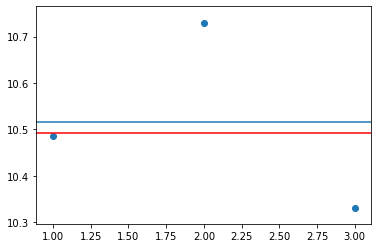

In [33]:
sample_means = []
population_mean = df['alcohol'].mean()
n_sample = 3
sample_size = 30

for i in range(n_sample):
    sample = df['alcohol'].sample(sample_size, random_state=i)
    sample_means.append(sample.mean())

plt.scatter(range(1,n_sample+1), sample_means)
plt.axhline(population_mean, color='red')
sample_size_mean = np.array(sample_means).mean()
plt.axhline(sample_size_mean)

print("Actual Mean: %2f" % (population_mean))
print("Sample Mean: %2f" % (sample_size_mean))
print("Sample Error: %2f" % (population_mean-sample_size_mean))

In [34]:
df['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [35]:
white = df[df.type == 'white']
red = df[df.type == 'red']

In [36]:
alcohol_per_wine_type = {}

for wine_df, wine_type in [(white, 'white'), (red, 'red')]:
    sample = wine_df['alcohol'].sample(250, random_state = 0)
    alcohol_per_wine_type[wine_type] = sample.mean()

print(alcohol_per_wine_type)

{'white': 10.610040000011999, 'red': 10.47900000000001}


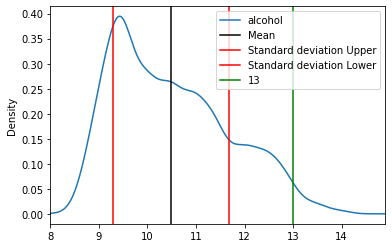

In [41]:
df['alcohol'].plot.kde(xlim=(df['alcohol'].min(), df['alcohol'].max()))

std = df['alcohol'].std(ddof=0)
mean = df['alcohol'].mean()

plt.axvline(mean, color='Black', label='Mean')
plt.axvline(mean + std, color='Red', label='Standard deviation Upper')
plt.axvline(mean - std, color='Red', label='Standard deviation Lower')
plt.axvline(13, color='Green', label='13')
plt.legend()

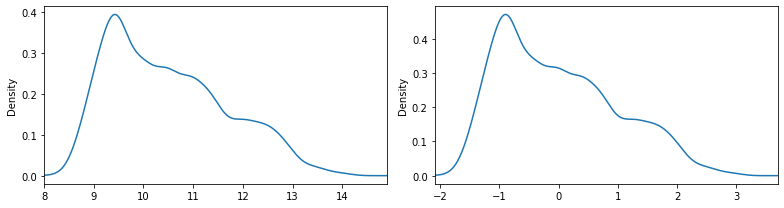

In [40]:
mean = df['alcohol'].mean()
std = df['alcohol'].std(ddof=0)

df['z_scores'] = df['alcohol'].apply(lambda x: ((x - mean) / std))

plt.figure(figsize = (11, 3))
plt.subplot(1, 2, 1)
df['alcohol'].plot.kde(xlim=(df['alcohol'].min(), df['alcohol'].max()))

plt.subplot(1, 2, 2)
df['z_scores'].plot.kde(xlim = (df['z_scores'].min(), df['z_scores'].max()))

plt.tight_layout()